<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Plot the training data**



*   plot the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)


1. Training Data

*   load the training data file ('data-nonlinear.txt')

*   each row {(x(i),y(i),l(i))} of the data consists of a 2-dimensional point (x,y) with its label l


*   x,y∈R and l∈{0,1}




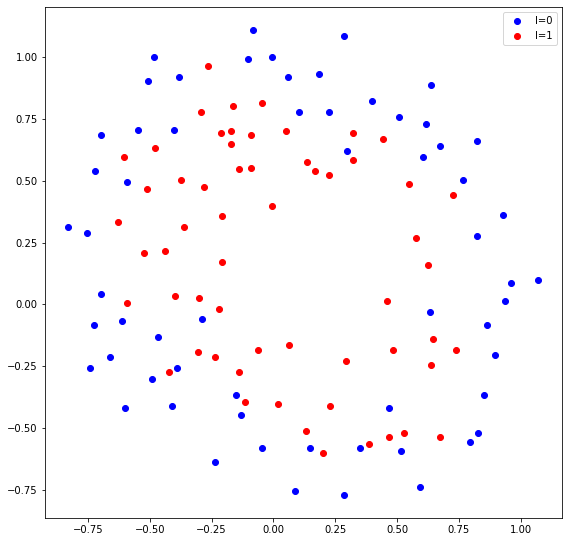

In [303]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment6/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1",c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


#**2.Write down the high dimensional function g(x,y;θ)**



*   write down the equation for the non-linear function g(x,y;θ) used for the classifier in LaTeX format



2. Logistic regression



theta 초기값

 theta_0 : 2.0

 theta_1 : 4.0
 
 theta_2 : 6.0

In [0]:
theta_0=2.0
theta_1=4.0
theta_2=6.0

theta_k=[]
theta_k.append(theta_0)
theta_k.append(theta_1)
theta_k.append(theta_2)

n_theta = len(theta_k)

z=θ0+θ1x^2+θ2y^2 where θ0,θ1,θ2∈R



In [0]:
f=[]
f.append(1)
f.append(x**2)
f.append(y**2)

z1 = theta_k[0]*(f[0]) + theta_k[1]*(f[1]) + theta_k[2] *(f[2])

sigmoid : σ(z)=1/(1+exp(−z))

In [0]:
sigmoid1 = 1/(1+np.exp(-z1))

3. Objective Function

OF = objective function
J(θ)=m1​∑i=1m​(−l(i)log(σ(g(x(i),y(i);θ)))−(1−l(i))log(1−σ(g(x(i),y(i);θ))))

4. Gradient Descent

θk(t+1)​:=θ0(t)​−αm1​∑i=1m​(σ(g(x(i),y(i);θ))−l(i))∂θk​∂g(x(i),y(i);θ(t))​, for all kkk

m = number of data

steps = 100000 번의 학습 사이클. 

learning_rate = 0.03

In [0]:
m = len(x)
steps = 100000
learning_rate = 0.03

In [0]:
from sympy import Derivative, symbols

arr_theta_k=[]

for i in range(n_theta):
  arr_theta_k.append([])

arr_OF=[]

gradient_theta_k=[]

for i in range(n_theta):
  gradient_theta_k.append(0)

z1_label_1=[]
z1_label_0=[]

real_label_0 = len(x_label0)
real_label_1 = len(x_label1)

accutrate_rate_arr = []

for i in range(steps):
  z1 = theta_k[0] + theta_k[1]*(x**2) + theta_k[2] *(y**2)
  sigmoid2 = 1/(1+np.exp(-z1))

  OF = np.sum((-label * np.log10(sigmoid2)) - ((1-label) * np.log10(1-sigmoid2)))/(m)

  z1_label_1=[]
  z1_label_0=[]

  for j in range(len(z1)):
    if(z1[j]>=0):
      z1_label_1.append(z1[j])
    else:
      z1_label_0.append(z1[j])

  # print(len(z3_label_0)) # 58
  # print(len(z3_label_1)) # 60

  prediction_label_0 = len(z1_label_0)
  prediction_label_1 = len(z1_label_1)
  total_prediction = prediction_label_0 + prediction_label_1

  gap_label_0 = abs(real_label_0 - prediction_label_0)
  gap_label_1 = abs(real_label_1 - prediction_label_1)

  total_gap = gap_label_0 + gap_label_1
  correct_predictions = total_prediction - total_gap

  # print(correct_predictions)

  accurate_rate = correct_predictions / total_prediction * 100
  # print("accurate_rate : ",accurate_rate,"%")

  accutrate_rate_arr.append(accurate_rate)

  for i in range(n_theta):
    gradient_theta_k[i]=np.sum((sigmoid2 - label) * f[i])/m

  for i in range(n_theta):
    arr_theta_k[i].append(theta_k[i])

  arr_OF.append(OF)
  
  for i in range(n_theta):
    theta_k[i] -= learning_rate*gradient_theta_k[i]

# print("accurate_rate : ",accurate_rate,"%")
# for i in range(100):
#   print(test[i])
# print()
# for i in range(100):
#   print(test[-i])

# print(total_prediction)
# print(correct_predictions)

#**3. Plot the training error**



*   plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color)



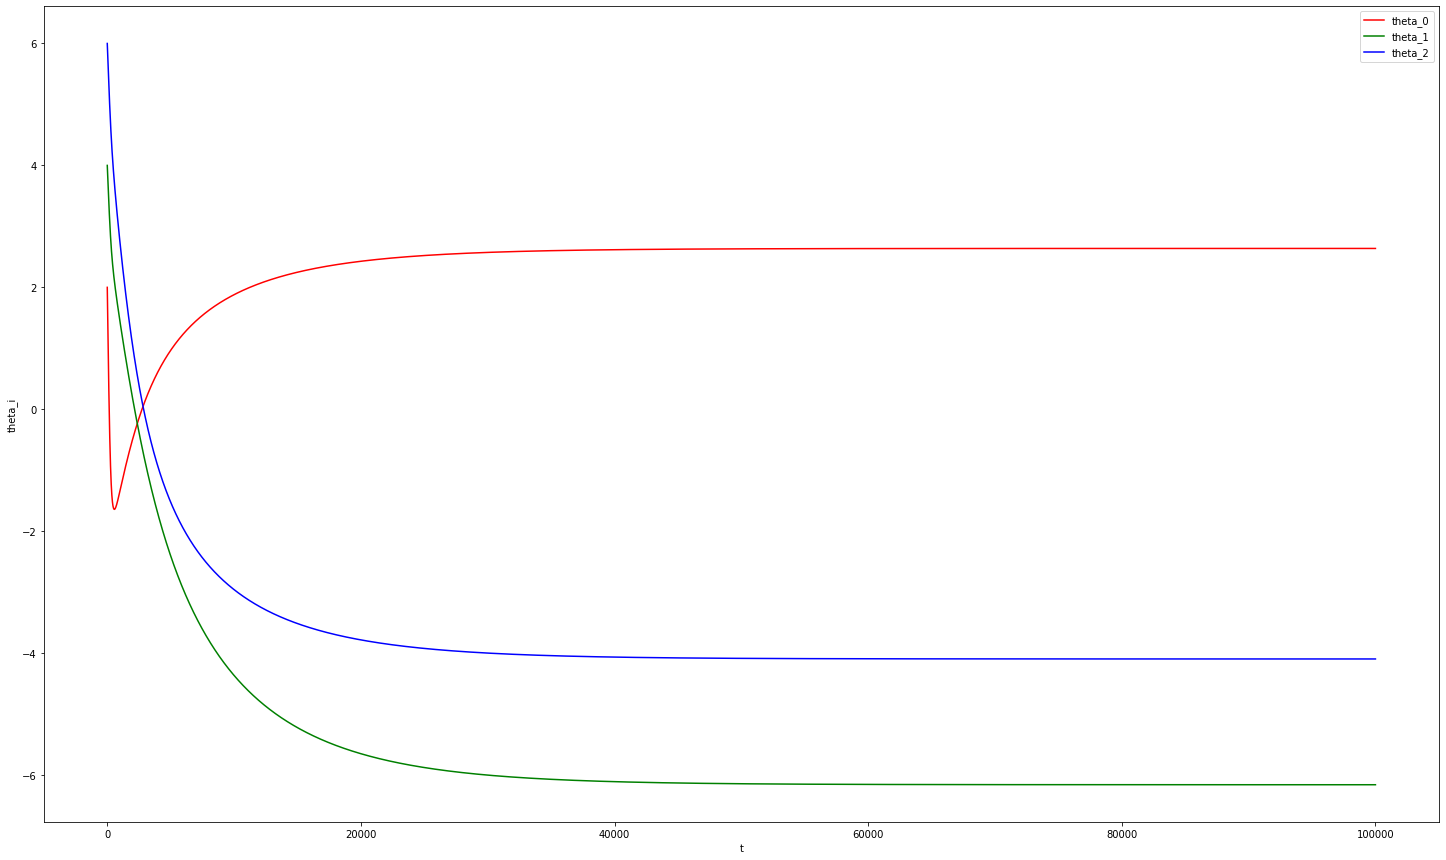

In [309]:
test0=np.array(arr_theta_k[0],dtype=float)
test1=np.array(arr_theta_k[1],dtype=float)
test2=np.array(arr_theta_k[2],dtype=float)

t=np.arange(0,100000,step=1)

plt.figure(figsize=(25, 15))
plt.xlabel('t')
plt.ylabel('theta_i')
plt.plot(t,test0,color="red",label="theta_0")
plt.plot(t,test1,color="green",label="theta_1")
plt.plot(t,test2,color="blue",label="theta_2")

plt.legend()
plt.show()

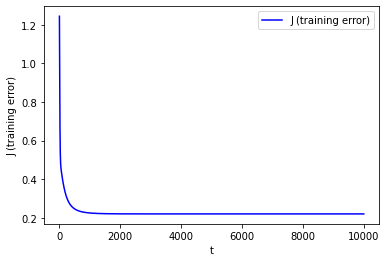

In [310]:
test5=np.array(arr_OF,dtype=float)

t=np.arange(0,10000,step=0.1)

plt.xlabel('t')
plt.ylabel('J (training error)')

plt.plot(t,test5,color="blue",label="J (training error)")

plt.legend()
plt.show()

#**4. Plot the training accuracy**



*   plot the training accuracy at every iteration of gradient descent until convergence (in red color)

*   the score will be given depending on the accuracy

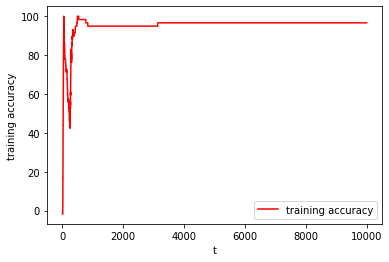

In [311]:
test=np.array(accutrate_rate_arr,dtype=float)

t=np.arange(0,10000,step=0.1)

plt.xlabel('t')
plt.ylabel('training accuracy')

plt.plot(t,test,color="red",label="training accuracy")

plt.legend()
plt.show()

#**5. Write down the final training accuracy**



*   present the final training accuracy in number (%) at convergence
*   the score will be given depending on the accuracy



In [312]:
print("accurate_rate : ",accurate_rate,"%")

accurate_rate :  96.61016949152543 %


#**6. Plot the optimal classifier superimposed on the training data**



*   plot the boundary of the optimal classifier at convergence (in green color)

*   the boundary of the classifier is defined by {(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}

*   plot the training data points (x,y) with their labels lll in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
*   you can use contour function in python3


*   the score will be given depending on the accuracy


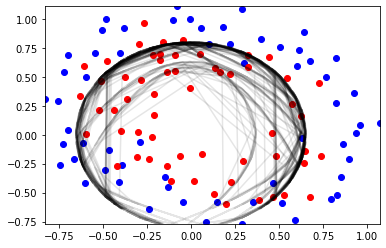

<Figure size 864x864 with 0 Axes>

In [313]:
X,Y = np.meshgrid(x,y)

# print(theta_k[0],theta_k[1],theta_k[2])

z2 = theta_k[0]*(f[0]) + theta_k[1]*(X**2) + theta_k[2] *(Y**2)

# z2_label_1=[]
# z2_label_0=[]

# z3_label_1=[]
# z3_label_0=[]

# for i in range(len(z2[0])):
#   for j in range(len(z2[0])):
#     if(z2[i][j]>=0):
#       z2_label_1.append(z2[i][j])
#     else:
#       z2_label_0.append(z2[i][j])

# print(len(z2_label_1))
# print(len(z2_label_0))

# print(len(x))
# print(len(z2[0]))


# print(z2.shape)

# print(z2[117][117])

# print(len(z2[0]))

# print(z2[0][1])

# if(z2.any()==0.5696609747771906):
#   print(z2)



# plt.contourf(X, Y, z2,alpha=0.01) 
# plt.contour(X, Y, z2,alpha=0.1) 

# cp = plt.contour(X, Y, z2)
# plt.clabel(cp, inline=True, 
#           fontsize=10)

#                 #  levels = np.linspace(z2.reshape(-1, 1).min(), z2.reshape(-1, 1).max(), 50))

# plt.xlabel('x')
# plt.ylabel('y')

# ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')

# levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
# levels=[0.0,1.0]


# contour = plt.contour(X, Y, z2, colors='k')
# plt.clabel(contour, colors = 'k', fontsize=12)
# contour_filled = plt.contourf(X, Y, z2, levels)
# contour_filled = plt.contourf(X, Y, z2)
# plt.colorbar(contour_filled)


plt.contour(X, Y, z2, levels=0, colors='k',alpha=0.1)

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1", c='r')
# plt.tight_layout()
# plt.gca().set_aspect('equal', adjustable='box')

plt.figure(figsize=(12, 12))
# plt.legend()
plt.show()